# K Nearest Neighbor

In my previous aritcles on `machine learning` algorithms I talked about `linear regression` and `logistic regression`. These two algorithms are `same same, but different` and also they are linear algorithms. So, Let's talk about a `non-linear algorithm` called `K Nearest Neighbor` (KNN).

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# Introduction

`K nearest neighbor` is a very special algorithm that opened up a whole new world of possibilities for `machine learning` algorithms. It can be used for both `classification` and `regression` problems.

Unlike other machine learning algorithms `KNN` is not dependent on the relation between the `features` and the `target variable`. 

It is dependent on the `distance` between the `features` and the `target variable`.

Now, what do I mean by distance?

## Internal Workings of KNN

Let's say we have dataset Like below:

In [1]:
import numpy as np
import pandas as pd

np.random.seed(4)

# Class A cluster
A_x1 = np.random.normal(loc=3, scale=0.3, size=10)
A_x2 = np.random.normal(loc=3, scale=0.3, size=10)

# Class B cluster
B_x1 = np.random.normal(loc=4, scale=0.3, size=10)
B_x2 = np.random.normal(loc=4, scale=0.3, size=10)

df = pd.DataFrame({
    "Feature_1": np.concatenate([A_x1, B_x1]),
    "Feature_2": np.concatenate([A_x2, B_x2]),
    "Target": ["Class_A"] * 10 + ["Class_B"] * 10
})

df.head()


,Feature_1,Feature_2,Target
0,3.015169,3.185601,Class_A
1,3.149985,2.973604,Class_A
2,2.701227,3.127522,Class_A
3,3.208080,3.099676,Class_A
4,2.874510,2.652955,Class_A


Here, I made a synthetic dataset for KNN demonstration.

This dataset has two features `Feature_1` and `Feature_2` and one target variable `Target`.

The `target` variable has two classes `Class_A` and `Class_B`.

So, it's a categorical variable. The `KNN` algorithm is going to predict the `target` variable based on the `features`.

So, let's do some data visualization.

Let's see if there's any `relations` between the `features`.

As both the `features` are continuous variables, we can use `scatter plot` to visualize the relationship between the `features`.

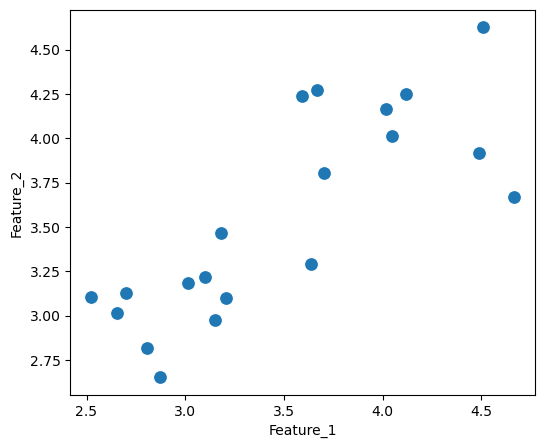

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="Feature_1",
    y="Feature_2",
    s=100,
)
plt.show()


The well, we can clearly cannot see any relationship between the `features`. The data is fully scattered and we cannot specify any clear relations between the `features`.

But here's the twist.

> Just set hue. Try it. Something interesting will happen.

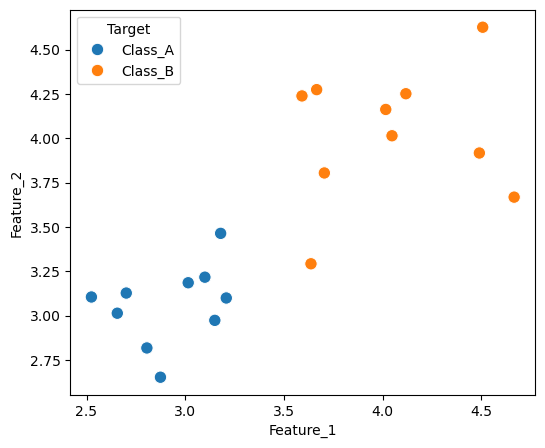

In [3]:

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="Feature_1",
    y="Feature_2",
    hue="Target",
    s=80,
)

plt.show()

Woh! Where did that come from?

Even though there is no well defined relationship between the `features` there is a clear distinction between the `classes` `Class_A` and `Class_B`.

So, as you can see here there is a partition between the two classes.

So, Let's do a thought experiment.

What if there is a new datapoint like below? in the scatter plot.


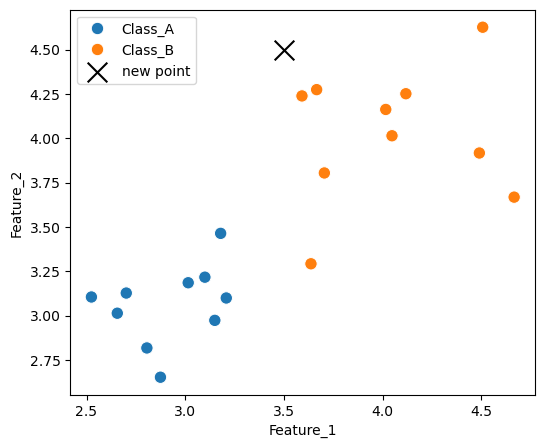

In [4]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="Feature_1",
    y="Feature_2",
    hue="Target",
    s=80,
)

plt.scatter(
    x=[3.5],
    y=[4.5],
    c="black",
    s=200,
    marker="x",
    label='new point'
)

plt.legend()

Which class do you think this new datapoint belongs to?

We can say it belongs to `Class_B` because it is far away from `Class_A` datapoints and surrounded by `Class_B` datapoints.

Same goes for this `datapoint` below.

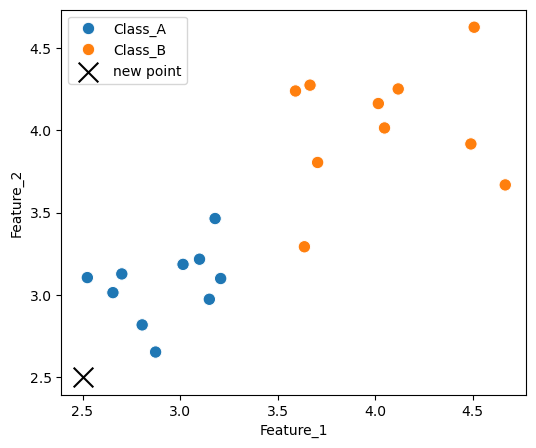

In [5]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="Feature_1",
    y="Feature_2",
    hue="Target",
    s=80,
)

plt.scatter(
    x=[2.5],
    y=[2.5],
    c="black",
    s=200,
    marker="x",
    label='new point'
)

plt.legend()

We can say that this new datapoint belongs to `Class_A` because it is far away from `Class_B` datapoints and surrounded by `Class_A` datapoints.

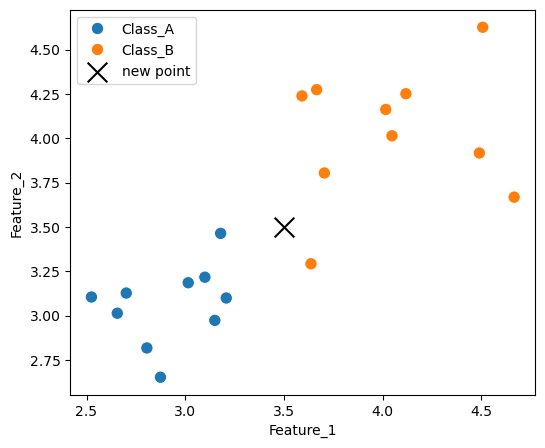

In [7]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="Feature_1",
    y="Feature_2",
    hue="Target",
    s=80,
)

plt.scatter(
    x=[3.5],
    y=[3.5],
    c="black",
    s=200,
    marker="x",
    label='new point'
)

plt.legend()

Now, what about this new datapoint?

Now, we have a dilemma.

This data point is exactly in between the `Class_A` and `Class_B` datapoints.

How, do we decide which class it belongs to?

This is the driving force of `K nearest neighbor` algorithm.

We recognised which class a datapoint belongs to by looking at the `neighbors` of the datapoint.

If the datapoint is surrounded by `Class_A` datapoints then it belongs to `Class_A` and if the datapoint is surrounded by `Class_B` datapoints then it belongs to `Class_B`.

Simple intuition right?

So, let's get into the details of `K nearest neighbor` algorithm.

## Desicion Making with KNN

In this algorithm we use `distance` to decide which `class` a datapoint belongs to.

- First we measure the `distance` between the `datapoint` and all the `datapoints` in the dataset.

- And we `sort` the distance in `ascending` order.

- Then we take the first `K` datapoints with the `smallest` distance. This is why it's called `K nearest neighbor`.

- And we decide which `class` they belong to.

How do we decide?

WE USE THE `MAJORITY VOTE`!

First time hearing this term?

_`Majority voting` is a voting system in which the `candidate` with the `highest` number of `votes` is declared the `winner`._

Suppose, you have a datapoint that has `5 neighbors`.

THe neighbors are `Class_A`, `Class_B`, `Class_A`, `Class_A` and `Class_B`.


As `class_A` has `3 votes` and `class_B` has `2 votes` then `class_A` is the winner.

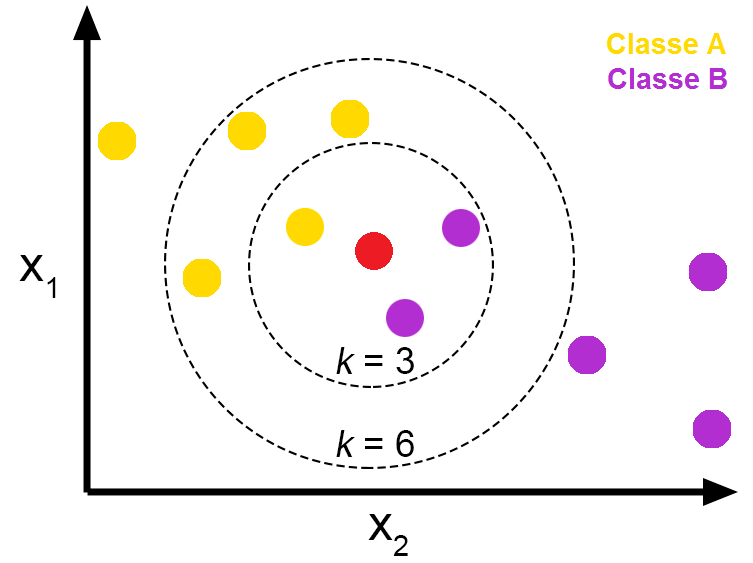

I think this image describes `K nearest neighbor` algorithm very well.

So, let's mathematically see which `class` a datapoint belongs to.

## The Math Behind KNN

Let's say out new datapoint is [3.5, 3.5] and we want find a `class` for it.

So, step 1: Find the distance between the new datapoint and all the datapoints in the dataset.

In [10]:
import numpy as np
import pandas as pd

data_point = np.array([3.5, 3.5])

# Euclidean distance for each row
df['Distance'] = np.sqrt(
    (df['Feature_1'] - data_point[0])**2 +
    (df['Feature_2'] - data_point[1])**2
)

df


,Feature_1,Feature_2,Target,Distance
0,3.015169,3.185601,Class_A,0.577848
1,3.149985,2.973604,Class_A,0.632142
2,2.701227,3.127522,Class_A,0.881350
3,3.208080,3.099676,Class_A,0.495456
4,2.874510,2.652955,Class_A,1.052959
5,2.524627,3.105299,Class_A,1.052208
6,2.805688,2.817934,Class_A,0.973285
7,3.179573,3.464094,Class_A,0.322433
8,3.099675,3.217002,Class_A,0.490253
9,2.655757,3.013841,Class_A,0.974216


Here, we see the `euclidean distance` between the `new datapoint` and all the `datapoints` in the dataset.

And next step is to `sort` the distance in `ascending` order.

In [12]:
df.sort_values(by='Distance', inplace=True)
df

,Feature_1,Feature_2,Target,Distance
13,3.637316,3.292578,Class_B,0.248756
7,3.179573,3.464094,Class_A,0.322433
10,3.705103,3.804632,Class_B,0.367244
8,3.099675,3.217002,Class_A,0.490253
3,3.208080,3.099676,Class_A,0.495456
0,3.015169,3.185601,Class_A,0.577848
1,3.149985,2.973604,Class_A,0.632142
19,3.591710,4.238954,Class_B,0.744623
12,4.047968,4.014402,Class_B,0.751584
17,3.666156,4.274452,Class_B,0.792076


And we are ready to find which class the new datapoint belongs to.

But first let's talk about the distance function.

You can use two distance functions.

- Euclidean distance.

$$
d(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$$

Here, `x` and `y` are the data points positions.

- Manhattan distance.

$$
d(x, y) = |x_1 - y_1| + |x_2 - y_2|
$$

Both distance functions can be used for `K nearest neighbor` algorithm.

`Euclidean distance` is the direct distance between the datapoints.

`Manhattan distance` is the distance between the datapoints in the `horizontal` and `vertical` direction.

> By default, `Euclidean distance` is used in `K nearest neighbor` algorithm.

Now, let's see which `class` the new datapoint belongs to.

We take `k` number of datapoints with the `smallest` distance.

Let's say k is 1.

So, the smallest distance to the `new datapoint` itself is class `B`.

What if k is 3?

Three smallest distances are `Class_B`, `Class_A` and `Class_B`.

So, by majority voting, `Class_B` wins.

And one last time let's see k is 5.

5 smallest distances are `Class_B`, `Class_A`, `Class_B`, `Class_A` and `Class_A`.

So, by majority voting, `Class_A` wins.

Wow, If we take k=1 then we get `Class_B` and if we take k=5 then we get `Class_A`.

So, which one we should take?

It depends on the `problem` we are solving.

And experimentation of different `k` values can help us find the best `k` value.

Selecting the best `k` value can be a tedious process.

Just remember these two things:

- High `k` can lead to overfitting.
- Low `k` can lead to underfitting.

So, try it out with different `k` values to find out the sweet spot.

## Pros & Cons

Pros:

- Easy to implement.
- Can be used for both `classification` and `regression` problems.
- Intuive and easy to understand.
- Purely statistical approach and has no underlying assumptions.
- Has reasonable accuracy.
- Can be used for both `small` and `large` datasets.
- Doesn't need any contextual information of the data.

However, there are some cons:

- Can be sensitive to the choice of `k`.
- Computationally expensive.
- Performance can degrade with large number of features.
- Can be affected by outliers/noise.
- Struggles with imbalanced datasets.

Wow, some many pros and so many cons. But it's a very easy algorithm to get your mind around and use. So, let's make use `k nearest neighbor` algorithm for our problem.
